# Déterminer si une personne va couler ou non

In [127]:
import matplotlib
print(matplotlib.__version__)

3.7.1


In [128]:
# Commençons par faire les imports nécessaire
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [129]:
# Récupérer les données
df_titanic = pd.read_csv('Titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploration des données

In [130]:
# Exploration des données
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


On observe qu'il y a 5 objets ainsi que trois catégories avec des valeures nulles (Age, Cabin, Fare)

In [131]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabine a 687 valeures nulles et 204 non-nulles donc cabine peut être éliminée

<Axes: >

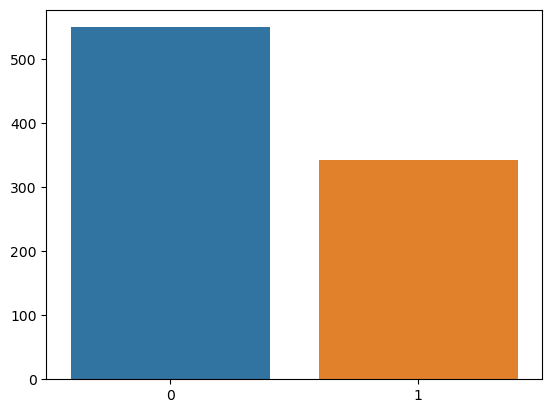

In [132]:
# Déterminons combien de personnes ont survécu
survived = df_titanic.Survived.value_counts()
sns.barplot(x=survived.index, y=survived.values)

On voit que moins de la moitié des passagers a survécu.

<Axes: >

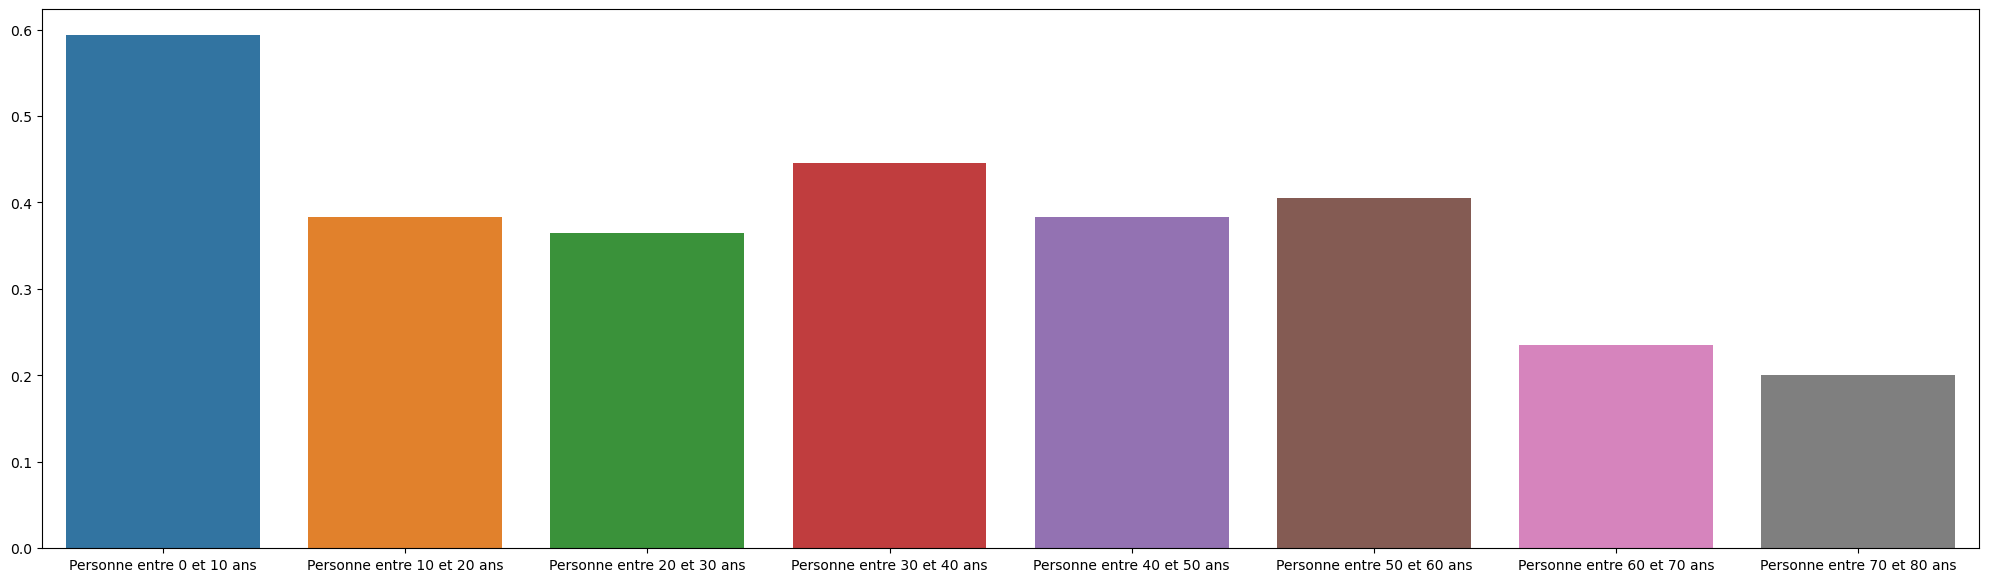

In [158]:
# Affichons les survivants en fonction de l'âge
age_survived = pd.crosstab(df_titanic.Age, df_titanic.Survived)
age_survived.columns = ["non_survived", "survived"]
stat_survive = {}
for i in range(10, 81, 10):
    stat_survive[f"Personne entre {i -10} et {i} ans"] = age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]["survived"].sum() / (age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]['survived'].sum() + age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]['non_survived'].sum())
fig, ax = plt.subplots(figsize=(25, 7))
sns.barplot(x=list(stat_survive.keys()), y=list(stat_survive.values()))


,non_survived,survived
Age,,
11.0,3,1
12.0,0,1
13.0,0,2
14.0,3,3
14.5,1,0
...,...,...
70.0,2,0
70.5,1,0
71.0,2,0


In [139]:
age_survived[age_survived.index <= 10]

,non_survived,survived
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
1.00,2,5
2.00,7,3
3.00,1,5
4.00,3,7
